IMPORTING NECESSARY LIBRARIES

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, models, datasets



In [39]:
IMAGE_SIZE = 256
BATCH_SIZE = 5
CHANNELS=3
EPOCHS = 50

LOADING THE DATASET AND MAKING IT READY FOR TRAINING 

In [8]:
from random import shuffle


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "rice_leaf_diseases",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,

)

Found 120 files belonging to 3 classes.


In [31]:
class_names = dataset.class_names
class_names
len(class_names)

3

In [10]:
len(dataset)

24

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(5, 256, 256, 3)
[0 0 1 1 0]


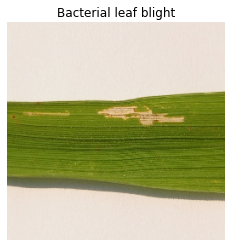

In [16]:
for image_batch, label_batch in dataset.take(1):
    for i in range(4):
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [23]:
#len(dataset)*(0.1)
#train_ds = dataset.take(19)
#validation_ds = dataset.take(2)
#test_ds = dataset.take(2)

In [26]:
def get_dataset_partitions_tf(dataset, train_split = 0.8, validation_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    ds_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=5)

    train_size = int(train_split*ds_size)
    validation_size = int(validation_split*ds_size)
    test_size = int(test_split*ds_size)
    train_ds = dataset.take(train_size)
    validation_ds = dataset.skip(train_size).take(validation_size)
    test_ds = dataset.skip(train_size).skip(validation_size)
    return train_ds, validation_ds, test_ds

In [27]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

DATA AUGMENTATION

In [29]:
resize_and_rescale = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [30]:
data_augmentation = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [40]:
cnn = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3) ,activation='relu', input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')

])


In [41]:
cnn.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
cnn.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=validation_ds
)

Epoch 1/50
19/19 [==============================] - 14s 517ms/step - loss: 1.1297 - accuracy: 0.3158 - val_loss: 1.0982 - val_accuracy: 0.3000
Epoch 2/50
19/19 [==============================] - 9s 463ms/step - loss: 1.0997 - accuracy: 0.2632 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 3/50
19/19 [==============================] - 9s 459ms/step - loss: 1.0989 - accuracy: 0.2842 - val_loss: 1.0998 - val_accuracy: 0.3000
Epoch 4/50
19/19 [==============================] - 9s 457ms/step - loss: 1.0949 - accuracy: 0.4421 - val_loss: 1.0936 - val_accuracy: 0.7000
Epoch 5/50
19/19 [==============================] - 9s 461ms/step - loss: 1.0682 - accuracy: 0.4526 - val_loss: 0.9971 - val_accuracy: 0.4000
Epoch 6/50
19/19 [==============================] - 9s 457ms/step - loss: 1.0804 - accuracy: 0.4000 - val_loss: 1.0637 - val_accuracy: 0.4000
Epoch 7/50
19/19 [==============================] - 9s 465ms/step - loss: 1.0564 - accuracy: 0.4421 - val_loss: 1.1190 - val_accuracy: 0.2000
Epoch

In [43]:
scores = cnn.evaluate(test_ds)

3/3 [==============================] - 2s 80ms/step - loss: 0.6093 - accuracy: 0.7333


In [44]:
def predicted(cnn, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = cnn.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

In [45]:
model_version = 1
cnn.save(f"rice_leaf_diseases_main/models/{model_version}")

INFO:tensorflow:Assets written to: rice_leaf_diseases_main/models/1\assets


INFO:tensorflow:Assets written to: rice_leaf_diseases_main/models/1\assets
